Identified Frequencies: [232.79445727 235.1039261  236.48960739 237.87528868 239.26096998
 240.18475751 241.10854503 242.03233256 243.41801386 244.80369515
 247.57505774 382.44803695 384.75750577 386.60508083 387.99076212
 388.91454965 389.83833718 390.76212471 392.147806   393.07159353
 394.91916859 397.22863741]


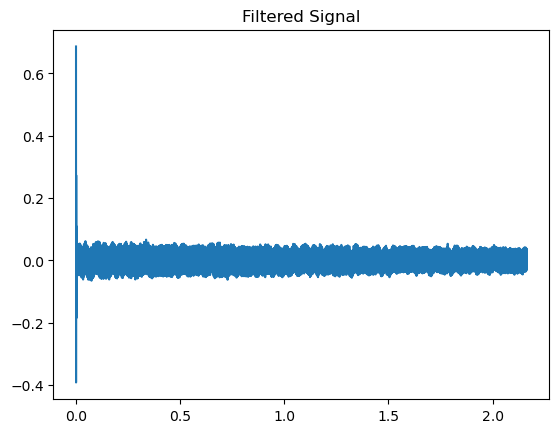

Writing filtered_output.wav


In [8]:
from thinkdsp import read_wave, Wave, Spectrum
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import scipy

wave = read_wave('CSIWave01.wav')
spectrum = wave.make_spectrum()

def butter_bandstop(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    y = lfilter(b, a, data)
    return y

peaks, _ = scipy.signal.find_peaks(spectrum.amps, height=500)
identified_frequencies = spectrum.fs[peaks]
print("Identified Frequencies:", identified_frequencies)

# Define the filter parameters
filtered_wave = wave.copy()
lowcut = min(identified_frequencies) - 200 # Adjust as needed
highcut = max(identified_frequencies) + 200  # Adjust as needed
order = 5

# Apply bandstop filters for each identified interfering frequency
filtered_wave.ys = butter_bandstop(filtered_wave.ys, lowcut, highcut, wave.framerate, order)

# Plot the filtered signal in the time domain
filtered_wave.plot()
plt.title('Filtered Signal')
plt.show()

# Save the filtered wave to a new file (optional)
filtered_wave.write('filtered_output.wav')

# Listen to the filtered signal (if you have an audio player in your environment)
filtered_wave.make_audio()

In [ ]:
min(identified_frequencies)

AttributeError: 'NoneType' object has no attribute 'plot'

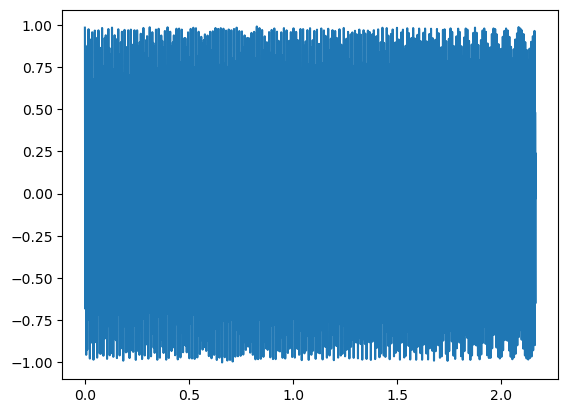

In [4]:
from thinkdsp import read_wave

# Load the original wave file
wave = read_wave('CSIWave01.wav')
spectrum = wave.make_spectrum()

# Define high and low cutoff frequencies
high_cutoff = 398  # Adjust as needed
low_cutoff = 232  # Adjust as needed

spectrum.high_pass(high_cutoff)

filtered_wave = highpass_wave
# Plot the original and filtered signals
wave.plot(label='Original Signal')
highpass_wave.plot(label='Filtered Signal')
plt.legend()
plt.title('Highpass and Lowpass Filtered Signal')
plt.show()

# Save the filtered wave to a new file (optional)
filtered_wave.write('filtered_output.wav')
